# Ising model: Monte Carlo Simulation

<img src="ising_lattice.png" style="width: 400px;"/> 

The simple Ising Hamiltonian can be written as 

$$ H=-\sum_{<i,j>} J_{ij} \sigma_i \sigma_{j}$$,

where $J_{ij}$ is a real number. We added a negative sign to the Hamiltonian: this is by convention. If the spins are antiferromagnetic, that is, they behave as we would expect from magnets, then all $J_{ij}$ values would be negative. That cancels out the negative sign of the sum, so we still expect that each product $\sigma_i\sigma_j$ would give you -1 in the optimum configuration.


In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
np.sign(2*np.random.rand(10)-1).astype('int')

array([ 1,  1,  1, -1,  1, -1,  1, -1,  1,  1])

In [3]:
class Ising2D():
    def __init__(self, L=10, seed=8848):
        
        self.L = L
        self.L2 = self.L * self.L
        np.random.seed(seed)
        # construct a lattice with random spins (+1, -1)
        self.Lattice = np.array([ np.sign(2*np.random.rand(self.L)-1).astype('int') for i in range(self.L)] )

    def Print_lattice(self):
        for row in self.Lattice:
            print (row)

    def Plot_lattice(self):
        fig,ax=plt.subplots(1,1, figsize=(6,6))
        sns.heatmap(self.Lattice, linecolor='white', cbar=True, ax=ax,\
                    square=True, cmap='viridis', xticklabels=[], yticklabels=[]);
        plt.show()
        
    def Compute_Energy(self, J=1):
        # one liner using list comprehension
        ene = np.sum([ -1.0*J*self.Lattice[i,j] *(self.Lattice[ (i+1)%self.L, j ] +\
                                                  self.Lattice[ (i-1)%self.L, j ] +\
                                                  self.Lattice[ i, (j+1)%self.L ] +\
                                                  self.Lattice[ i, (j-1)%self.L ] )\
                      for i in range(self.L) for j in range(self.L) ])
        return 0.5*ene # 0.5 to correct the double counting

    def MCC_sampling(self, PW, Nitt, warm=5000, measure=5):
        "Monte carlo sampling"
        Ene = self.Compute_Energy()
        Mn = np.sum(self.Lattice)

        Eaver = 0.0
        Maver = 0.0
        Naver = 0.0

        for itt in range(Nitt):
            t = int(np.random.rand()*self.L2)
            (i,j) = (t%self.L, t//self.L)
            S = self.Lattice[i,j]
            #print (i,j), S
            WF =self.Lattice[(i+1)%self.L,j] + self.Lattice[(i-1)%self.L,j] +\
                self.Lattice[i,(j+1)%self.L] + self.Lattice[i,(j-1)%self.L]
            # new configuration -S , old configuration is S
            # eneryg change is : (-J)*WF*(-S) - (-J)*WF*S = 2*J*WF*S 
            # P = exp(-2*WF*S/T) = exp(-(WF*S)/T) = PW[4+WF*S]
            P = PW[4+S*WF]
            if P > np.random.rand():    # flip the spin
                self.Lattice[i,j] = -S
                Ene += 2*S*WF
                Mn -= 2*S

            if itt > warm and itt%measure == 0:
                Eaver += Ene
                Maver += Mn
                Naver += 1

        return (Maver/Naver, Eaver/Naver)
    
    def compute_Transition(self, Nitt=100000, ax=None):
        PW = np.zeros(9,dtype = float) # 9 because we go from -8 to 8 including zero

        wT = np.linspace(6, 0.5, 50)
        
        wMag = []
        wEne = []
        for T in wT:
            # PW[4+i] = exp(-i*2/T)
            PW[4+4] = np.exp(-4.*2/T)
            PW[4+2] = np.exp(-2.*2/T)
            PW[4+0] = 1.0
            PW[4-2] = np.exp(2.*2/T)
            PW[4-4] = np.exp(4.*2/T)

            (Mag, Ene) = self.MCC_sampling(PW, Nitt=Nitt)

            wMag.append(Mag/(self.L2))
            wEne.append(Ene/(self.L2))

        if ax is None:
            fig, ax = plt.subplots(1,1, figsize=(6,4))
        ax.scatter(wT, wMag, label='Magnetization', color='r')
        ax.scatter(wT, wEne, label='Energy', color='b')
        
        (ymin, ymax) = ax.get_ylim()
        ax.vlines(x=2.269, ymin=ymin, ymax=ymax, color='k', ls='--', lw=2., label='Exact Tc')
        ax.hlines(y=0, xmin=wT[-1], xmax=wT[0], ls='--', color='k', lw=1.)
        
        ax.set_xlabel("T", fontsize="large")
        ax.legend(loc='best',frameon=False, fontsize=16)

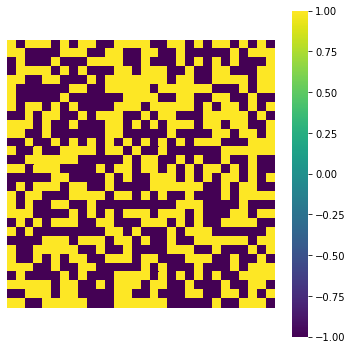

In [4]:
model = Ising2D(L=30)
model.Plot_lattice()

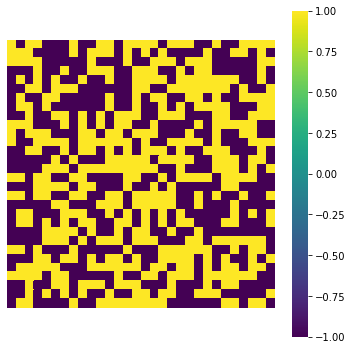

In [5]:
model = Ising2D(L=30, seed=10)
model.Plot_lattice()

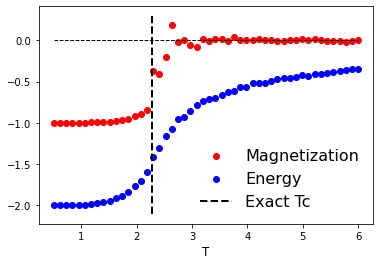

In [6]:
model = Ising2D(L=10, seed=20)
model.compute_Transition()

We can clearly see that around T=2.5, phase transision occurs and the system changes from non-magnetic to magnetic. (going from high T to low T). This is called Critical temperature. Note that the exact value from Onsager solution is $T_c=2.269$ and our number is very very close to that which can further be improved by increasing the lattice size, monte carlo steps and so on.